# Einlesen der Daten und erster Überblick

In [26]:
import pandas as pd
daten = pd.read_csv('d55.csv')  

In [27]:
daten.head()

,Name,Energie,Fett,FS,Kohlenhydrate,Zucker,Eisweiss,Salz,Label
0,Apfel,52,0.2,0.0,13.8,11.0,0.3,0.00,1
1,Banane,95,0.3,0.1,21.0,12.0,1.1,0.10,1
2,Haselnussschnitte,542,31.9,18.6,54.0,42.6,7.6,0.40,0
3,Gummibaerchen,343,0.1,0.1,77.0,46.0,6.9,0.07,0
4,Chips,503,28.0,2.6,53.0,2.9,6.3,2.80,0


# Entscheidungsbaum mit allen Daten für ersten Überblick

### Wähle alle Attribute für Entscheidungsbaum

In [28]:
attribute = daten.columns.drop('Name').drop('Label')
attribute

Index(['Energie', 'Fett', 'FS', 'Kohlenhydrate', 'Zucker', 'Eisweiss', 'Salz'], dtype='object')

### Erstelle Baum

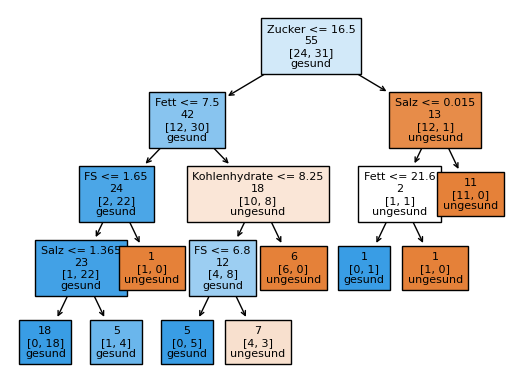

In [29]:
import sklearn.tree
import matplotlib
baum = sklearn.tree.DecisionTreeClassifier( random_state=0, max_depth=4)
baum.fit( daten[attribute], daten["Label"] )
sklearn.tree.plot_tree( baum, feature_names=attribute, label=None, 
                        filled=True,
                        class_names=["ungesund","gesund"], impurity=False,
                        proportion=False, fontsize=8 )
matplotlib.pyplot.show()

# Wähle wichtige Attribute für das Training

### Wichtigkeit der Attribute für den Baum


In [30]:
attribute

Index(['Energie', 'Fett', 'FS', 'Kohlenhydrate', 'Zucker', 'Eisweiss', 'Salz'], dtype='object')

In [31]:
baum.feature_importances_

array([0.        , 0.25366876, 0.16609413, 0.16142558, 0.36618287,
       0.        , 0.05262865])

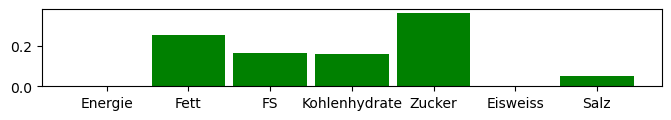

In [32]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(len(attribute))
bar_width = 0.9
fig = plt.figure()
plt.bar(index, baum.feature_importances_, bar_width,  color="green")
plt.xticks(index, attribute) # labels get centered
fig.set_figheight(1)
fig.set_figwidth(8)
plt.show()

# Split in Traings- und Testdaten

In [33]:
anzahl_training    = 39
anzahl_validierung = 10
anzahl_test        = 6
if( anzahl_training + anzahl_validierung + anzahl_test != len(daten)):
    print("ERROR: Anzahlen prüfen")

In [34]:
import random
rand_ind = list(range(len(daten)))
random.shuffle( rand_ind )
print( rand_ind )
print(len(rand_ind))

[27, 29, 48, 7, 12, 2, 30, 22, 24, 41, 18, 1, 36, 19, 3, 0, 54, 51, 45, 20, 31, 13, 49, 37, 4, 32, 44, 38, 11, 35, 40, 21, 47, 50, 6, 9, 14, 34, 5, 23, 52, 16, 10, 43, 28, 25, 17, 46, 15, 53, 8, 33, 39, 42, 26]
55


In [35]:
daten_training    = daten.loc[ rand_ind[:anzahl_training] ] 
daten_validierung = daten.loc[ rand_ind[anzahl_training:anzahl_training+anzahl_validierung] ] 
daten_test        = daten.loc[ rand_ind[anzahl_training+anzahl_validierung:] ]

# Training des Modells

In [36]:
attribute = ['Fett','Kohlenhydrate','Zucker']

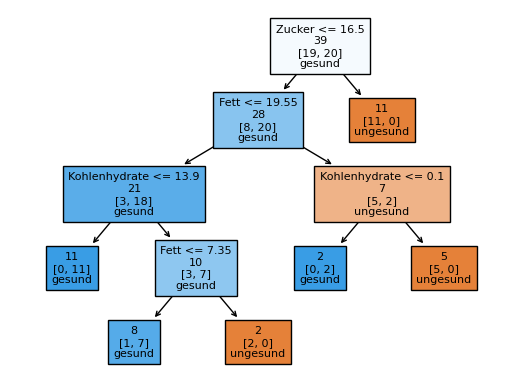

In [37]:
baum = sklearn.tree.DecisionTreeClassifier( random_state=0, max_depth=4)
baum.fit( daten_training[attribute], daten_training['Label'] )
sklearn.tree.plot_tree( baum, feature_names=attribute, label=None, 
                        filled=True,
                        class_names=["ungesund","gesund"], impurity=False,
                        proportion=False, fontsize=8 )
matplotlib.pyplot.show()

# Validierung

In [40]:
categorized_correct = 0
for i in daten_validierung.index:
    if( baum.predict(daten_validierung.loc[[i]][attribute]) == (daten_validierung.loc[i]['Label']) ):
        categorized_correct += 1
    else:
        print("falsch klassifiziert: ", i, daten_validierung.loc[i]['Name'])
print( "Anzahl  korrekt klassifiziert: ", categorized_correct )    
print( "Prozent korrekt klassifiziert: ", categorized_correct/len(daten_validierung)*100, "%")
print( "Anzahl  falsch klassifiziert: ", len(daten_validierung) - categorized_correct )    
print( "Prozent falsch klassifiziert: ", (len(daten_validierung) - categorized_correct)/len(daten_validierung)*100, "%")

falsch klassifiziert:  23 Bratwurst
falsch klassifiziert:  43 Walnuesse
falsch klassifiziert:  46 Datteln
falsch klassifiziert:  15 Broetchen
Anzahl  korrekt klassifiziert:  6
Prozent korrekt klassifiziert:  60.0 %
Anzahl  falsch klassifiziert:  4
Prozent falsch klassifiziert:  40.0 %


# Test der Güte des Models mit dem Trainingsdaten

In [41]:
categorized_correct = 0
for i in daten_test.index:
    if( baum.predict(daten_test.loc[[i]][attribute]) == (daten_test.loc[i]['Label']) ):
        categorized_correct += 1
    else:
        print("falsch klassifiziert: ", i, daten_test.loc[i]['Name'])
print( "Anzahl  korrekt klassifiziert: ", categorized_correct )    
print( "Prozent korrekt klassifiziert: ", categorized_correct/len(daten_test)*100, "%")
print( "Anzahl  falsch klassifiziert: ", len(daten_test) - categorized_correct )    
print( "Prozent falsch klassifiziert: ", (len(daten_test) - categorized_correct)/len(daten_test)*100, "%")

falsch klassifiziert:  26 Vegane Leberwurst
Anzahl  korrekt klassifiziert:  5
Prozent korrekt klassifiziert:  83.33333333333334 %
Anzahl  falsch klassifiziert:  1
Prozent falsch klassifiziert:  16.666666666666664 %
